<a href="https://colab.research.google.com/github/Eduardo-Rivera98/-lab-regression-analysis/blob/main/ModelGlaucoma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from numpy import load
import h5py

In [ ]:
from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
x=load('drive/MyDrive/x.npy')

In [ ]:
y=load('y.npy')

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
from keras import models
from keras import layers
import tensorflow as tf
model = models.Sequential()
model.add(layers.Conv2D(16, (3,3), activation='relu', input_shape=(250, 250, 1))),
model.add(layers.MaxPooling2D(2, 2)),
model.add(layers.Conv2D(32, (3,3), activation='relu')),
model.add(layers.MaxPooling2D(2,2)),
model.add(layers.Conv2D(64, (3,3), activation='relu')),
model.add(layers.MaxPooling2D(2,2)),
model.add(layers.Conv2D(64, (3,3), activation='relu')),
model.add(layers.MaxPooling2D(2,2)),
model.add(layers.Conv2D(64, (3,3), activation='relu')),
model.add(layers.MaxPooling2D(2,2)),
model.add(layers.Flatten()),
model.add(layers.Dense(512, activation='relu')),
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(x_train, y_train, epochs=20,verbose=1,shuffle = True, validation_data=(x_test,y_test))

Epoch 1/20
299/299 [==============================] - 289s 963ms/step - loss: 0.6121 - accuracy: 0.6631 - val_loss: 0.5508 - val_accuracy: 0.7224
Epoch 2/20
299/299 [==============================] - 296s 989ms/step - loss: 0.4894 - accuracy: 0.7570 - val_loss: 0.4446 - val_accuracy: 0.7897
Epoch 3/20
299/299 [==============================] - 278s 930ms/step - loss: 0.3855 - accuracy: 0.8270 - val_loss: 0.3349 - val_accuracy: 0.8478
Epoch 4/20
299/299 [==============================] - 267s 894ms/step - loss: 0.2601 - accuracy: 0.8958 - val_loss: 0.2443 - val_accuracy: 0.9026
Epoch 5/20
299/299 [==============================] - 267s 894ms/step - loss: 0.1708 - accuracy: 0.9341 - val_loss: 0.1669 - val_accuracy: 0.9436
Epoch 6/20
299/299 [==============================] - 256s 858ms/step - loss: 0.1201 - accuracy: 0.9581 - val_loss: 0.1401 - val_accuracy: 0.9544
Epoch 7/20
299/299 [==============================] - 254s 848ms/step - loss: 0.0783 - accuracy: 0.9727 - val_loss: 0.1570 -

In [ ]:
y_pred=(model.predict(x_test) > 0.5).astype("int32")

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1232
           1       0.98      1.00      0.99      1160

    accuracy                           0.99      2392
   macro avg       0.99      0.99      0.99      2392
weighted avg       0.99      0.99      0.99      2392



In [ ]:
precision_score(
y_test,
y_pred)

0.9797297297297297

(<Figure size 576x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f68a9d74310>)

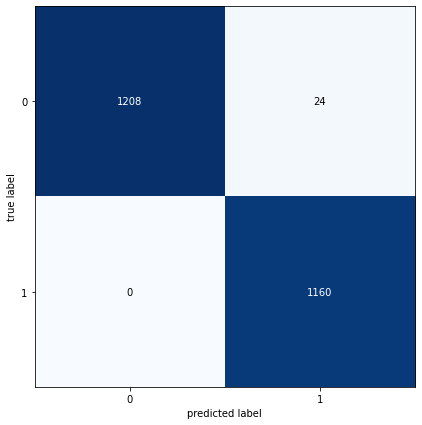

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7))

In [ ]:
model.save('drive/MyDrive/my_model_glaucoma.h5')

In [ ]:
##24 falsos postivos y ningun falso negativo, Genial!!

In [ ]:
drive.flush_and_unmount()

Drive not mounted, so nothing to flush and unmount.
